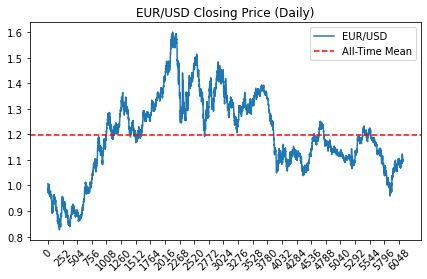

In [1]:
# Import data
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

# Importing the excel file into the Python interpreter
data = pd.read_excel('Daily_EURUSD_Historical_Data.xlsx')
data=data['<CLOSE>']

plt.figure(figsize=(7, 4))
plt.plot(data, label='EUR/USD')
plt.axhline(y=np.mean(data), color='red', linestyle='--', label='All-Time Mean')
plt.title('EUR/USD Closing Price (Daily)')
plt.legend()

# Set xticks to appear every 252 days
plt.xticks(range(0, len(data), 252), rotation=45)  # 252 days = 1 year in trading days
plt.show()


Text(0.5, 1.0, 'First Difference of EUR/USD Closing Price (Daily)')

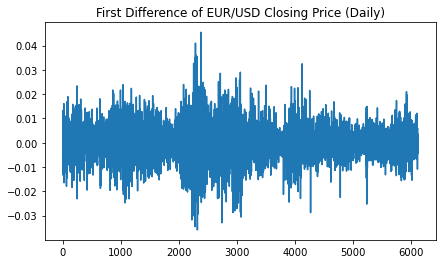

In [2]:
# Difference the data to make it stationary
datadiff = data.diff()
datadiff=datadiff.dropna()

plt.figure(figsize=(7, 4))
plt.plot(datadiff)
plt.title('First Difference of EUR/USD Closing Price (Daily)')

# First-differencing made our data stationary.

In [3]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data.values
y = data.shift(-1).values  # Shift the target variable by one day to align with features

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X[:-1], y[:-1], test_size=0.2, shuffle=False)


Baseline Model MSE: 2.536271151960782e-05


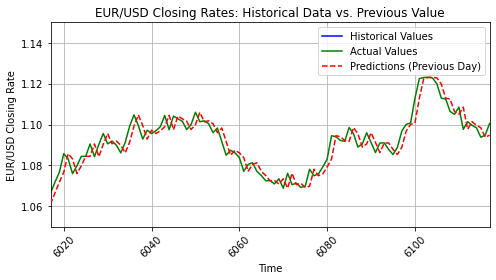

In [4]:
# Baseline model: Tomorrow's value will be the same as today's (i.e., random walk)
def baseline_model_1(X):
    return X

# Evaluate baseline model on validation set
y_pred_baseline = baseline_model_1(X_val)

# Calculate mean squared error (MSE) as a simple metric
mse_baseline_1 = np.mean((y_val - y_pred_baseline) ** 2)
print("Baseline Model MSE:", mse_baseline_1)


# Generate indices for plotting
idx = range(len(y_train))

# Calculate the starting index for predictions
start_pred_index = max(idx) + 1

# Generate indices for predictions starting from the end of actual values
idx_pred = range(start_pred_index, start_pred_index + len(y_pred_baseline))

# Plot historical data
plt.figure(figsize=(7, 4))

# Plot historical values on the validation set
plt.plot(idx, y_train, label='Historical Values', color='blue', zorder=2)

# Plot actual out-of-sample values on the validation set
plt.plot(idx_pred, y_val, label='Actual Values', color='green', zorder=2)

# Plot predictions on the validation set
plt.plot(idx_pred, y_pred_baseline, label='Predictions (Previous Day)', color='red', linestyle='--', zorder=3)

plt.xlabel('Time')
plt.ylabel('EUR/USD Closing Rate')
plt.title('EUR/USD Closing Rates: Historical Data vs. Previous Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Set x-limits to show just 200 days
plt.xlim(max(idx_pred)-100, max(idx_pred))
plt.ylim(1.05, 1.15)

plt.tight_layout()
plt.show()

Dummy Mean Model MSE: 0.005850350413712859


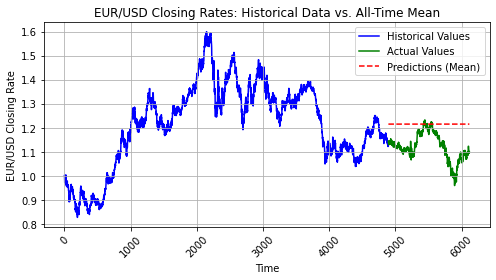

In [5]:
# Dummy model predicting the mean
class DummyMeanRegressor:
    def fit(self, X, y):
        self.mean_value = np.mean(y)
    
    def predict(self, X):
        return np.full(X.shape[0], self.mean_value)

# Create and train the dummy mean regressor
dummy_mean_regressor = DummyMeanRegressor()
dummy_mean_regressor.fit(X_train, y_train)

# Predict on the validation set
y_pred_dummy_mean = dummy_mean_regressor.predict(X_val)

# Calculate mean squared error (MSE) as a simple metric
mse_dummy_mean = np.mean((y_val[:50] - y_pred_dummy_mean[:50]) ** 2)
print("Dummy Mean Model MSE:", mse_dummy_mean)

# Plot historical data
plt.figure(figsize=(7, 4))

# Plot historical values on the validation set
plt.plot(idx, y_train, label='Historical Values', color='blue', zorder=1)

# Plot actual out-of-sample values on the validation set
plt.plot(idx_pred, y_val, label='Actual Values', color='green', zorder=1)

# Plot predictions on the validation set
plt.plot(idx_pred, y_pred_dummy_mean, label='Predictions (Mean)', color='red', linestyle='--', zorder=2)

plt.xlabel('Time')
plt.ylabel('EUR/USD Closing Rate')
plt.title('EUR/USD Closing Rates: Historical Data vs. All-Time Mean')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Dummy Last 252 Mean Model MSE: 0.002311623715833019


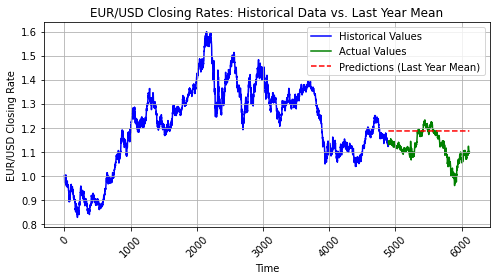

In [6]:
import numpy as np

# Dummy model predicting the mean of the last 252 values of X_train
class DummyLastYMeanRegressor:
    def fit(self, X, y):
        # Calculate the mean of the last 252 values of X_train
        self.last_252_mean = np.mean(X[-252:])
    
    def predict(self, X):
        # Predict the mean of the last 252 values of X_train for all instances in X
        return np.full(X.shape[0], self.last_252_mean)

# Create and train the dummy last 252 mean regressor
dummy_lastYmean = DummyLastYMeanRegressor()
dummy_lastYmean.fit(X_train, y_train)

# Predict on the validation set
y_pred_dummy_lastYmean = dummy_lastYmean.predict(X_val)

# Calculate mean squared error (MSE) as a simple metric
mse_dummy_lastYmean = np.mean((y_val[:50] - y_pred_dummy_lastYmean[:50]) ** 2)
print("Dummy Last 252 Mean Model MSE:", mse_dummy_lastYmean)

# Plot historical data
plt.figure(figsize=(7, 4))

# Plot historical values on the validation set
plt.plot(idx, y_train, label='Historical Values', color='blue', zorder=1)

# Plot actual out-of-sample values on the validation set
plt.plot(idx_pred, y_val, label='Actual Values', color='green', zorder=1)

# Plot predictions on the validation set
plt.plot(idx_pred, y_pred_dummy_lastYmean, label='Predictions (Last Year Mean)', color='red', linestyle='--', zorder=2)

plt.xlabel('Time')
plt.ylabel('EUR/USD Closing Rate')
plt.title('EUR/USD Closing Rates: Historical Data vs. Last Year Mean')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Last Value Model MSE: 3.468684999999983e-05


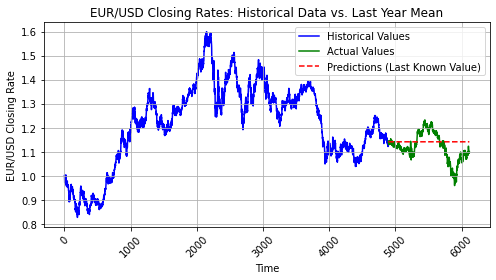

In [7]:
# Model predicting the last value of the training dataset
class LastValueRegressor:
    def fit(self, X, y):
        # Fit method does nothing as we only need to remember the last value
        
        # Remember the last value of the training dataset
        self.last_value = y[-1]
    
    def predict(self, X):
        # Predict the last value of the training dataset for all instances in X
        return np.full(X.shape[0], self.last_value)

# Create and train the last value regressor
last_value_regressor = LastValueRegressor()
last_value_regressor.fit(X_train, y_train)

# Predict on the validation set
y_pred_last_value = last_value_regressor.predict(X_val)

# Calculate mean squared error (MSE) as a simple metric
mse_last_value = np.mean((y_val[:50] - y_pred_last_value[:50]) ** 2)
print("Last Value Model MSE:", mse_last_value)

# Plot historical data
plt.figure(figsize=(7, 4))

# Plot historical values on the validation set
plt.plot(idx, y_train, label='Historical Values', color='blue', zorder=1)

# Plot actual out-of-sample values on the validation set
plt.plot(idx_pred, y_val, label='Actual Values', color='green', zorder=1)

# Plot predictions on the validation set
plt.plot(idx_pred, y_pred_last_value, label='Predictions (Last Known Value)', color='red', linestyle='--', zorder=2)

plt.xlabel('Time')
plt.ylabel('EUR/USD Closing Rate')
plt.title('EUR/USD Closing Rates: Historical Data vs. Last Year Mean')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Naive Seasonal Forecast Model MSE: 0.0049354505659999996


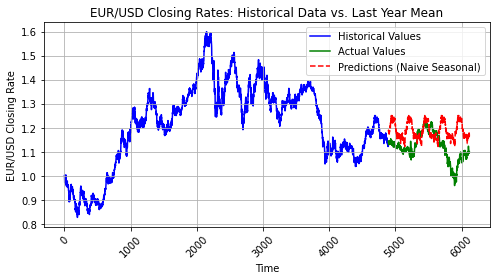

In [8]:
# Calculate the number of seasons in the validation set
SEASON_LEN=252

num_seasons = len(y_val) // SEASON_LEN  # Assuming season length is 252

# Repeat the seasonality for the length of the validation set
y_pred_naive_seasonal = np.tile(y_train[-SEASON_LEN:], num_seasons)

# If there are any remaining values in the validation set, repeat the seasonality for those as well
remaining_val_length = len(y_val) % SEASON_LEN
if remaining_val_length > 0:
    y_pred_naive_seasonal = np.concatenate((y_pred_naive_seasonal, y_train[-252:][:remaining_val_length]))

# Calculate mean squared error (MSE) as a simple metric
mse_naive_seasonal = np.mean((y_val[:50] - y_pred_naive_seasonal[:50]) ** 2)
print("Naive Seasonal Forecast Model MSE:", mse_naive_seasonal)

# Plot historical data
plt.figure(figsize=(7, 4))

# Plot historical values on the validation set
plt.plot(idx, y_train, label='Historical Values', color='blue', zorder=1)

# Plot actual out-of-sample values on the validation set
plt.plot(idx_pred, y_val, label='Actual Values', color='green', zorder=1)

# Plot predictions on the validation set
plt.plot(idx_pred, y_pred_naive_seasonal, label='Predictions (Naive Seasonal)', color='red', linestyle='--', zorder=2)

plt.xlabel('Time')
plt.ylabel('EUR/USD Closing Rate')
plt.title('EUR/USD Closing Rates: Historical Data vs. Last Year Mean')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

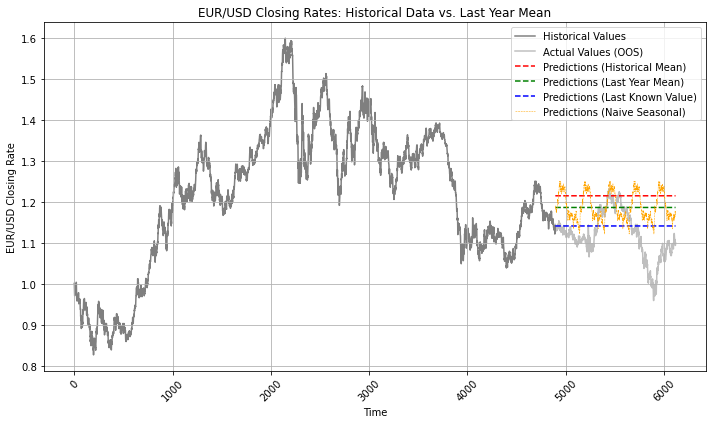

In [9]:
# Plot all baseline models together
# Plot historical data
plt.figure(figsize=(10, 6))

# Plot historical values on the validation set
plt.plot(idx, y_train, label='Historical Values', color='black',  alpha=0.5, zorder=1)

# Plot actual out-of-sample values on the validation set
plt.plot(idx_pred, y_val, label='Actual Values (OOS)', color='gray', alpha=0.5, zorder=1)

# Plot predictions on the validation set
plt.plot(idx_pred, y_pred_dummy_mean, label='Predictions (Historical Mean)', color='red', linestyle='--', zorder=2)
plt.plot(idx_pred, y_pred_dummy_lastYmean, label='Predictions (Last Year Mean)', color='green', linestyle='--', zorder=2)
plt.plot(idx_pred, y_pred_last_value, label='Predictions (Last Known Value)', color='blue', linestyle='--', zorder=2)
plt.plot(idx_pred, y_pred_naive_seasonal, label='Predictions (Naive Seasonal)', color='orange', linestyle='--', linewidth=0.5, zorder=2)


plt.xlabel('Time')
plt.ylabel('EUR/USD Closing Rate')
plt.title('EUR/USD Closing Rates: Historical Data vs. Last Year Mean')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

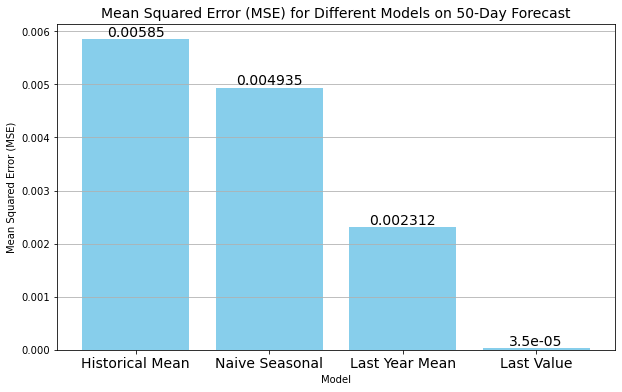

In [10]:
# List of models and their corresponding MSE values
models = ['Historical Mean', 'Naive Seasonal','Last Year Mean', 'Last Value'] #, 'RNN LSTM 1']
mse_values = [mse_dummy_mean, mse_naive_seasonal, mse_dummy_lastYmean, mse_last_value]#, rnn_lstm1_mse]


# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) for Different Models on 50-Day Forecast', fontsize=14)
plt.xticks(size=14)
plt.grid(axis='y')

# Add data labels
for bar, value in zip(bars, mse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 6), ha='center', va='bottom', fontsize=14)

plt.show()

In [11]:
# From ARMA notebook - for plots
aic_2 = -33825.51647740677   # ARMA(100*,100*)
aic_3 = -33817.41863368858   # ARMA(50*,50*)
aic_4 = -33832.28438124989   # ARMA(125*,125*)
aic_5 = -33824.702765558     # ARMA(0,50*)
aic_6 = -33834.15954039183   # ARMA(0,75*)
aic_7 = -33826.20044471335   # ARMA(50*,0)
aic_8 = -33837.41552847759   # ARMA(75*,0)

In [12]:
# From ARMA notebook - for plots
mse_model_2=3.838779261935971e-05   # ARMA(100*,100*)
mse_model_3=3.565023250107552e-05   # ARMA(50*,50*)
mse_model_4=5.256236170629871e-05   # ARMA(125*,125*)
mse_model_5=3.44179390953958e-05    # ARMA(0,50*)
mse_model_6=4.0288678903057156e-05  # ARMA(0,75*)
mse_model_7=3.505973193094169e-05   # ARMA(50*,0)
mse_model_8=3.840347075208189e-05   # ARMA(75*,0)


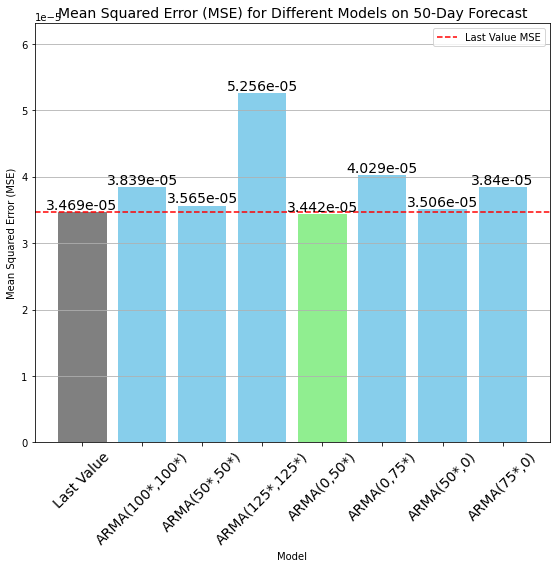

In [13]:
# List of models and their corresponding MSE values
models = ['Last Value', 'ARMA(100*,100*)', 'ARMA(50*,50*)', 
         'ARMA(125*,125*)', 'ARMA(0,50*)', 'ARMA(0,75*)',
         'ARMA(50*,0)', 'ARMA(75*,0)'] #, 'RNN LSTM 1']

mse_values = [mse_last_value, mse_model_2, mse_model_3, 
              mse_model_4, mse_model_5, mse_model_6,
              mse_model_7 ,mse_model_8]#, rnn_lstm1_mse]

# Create bar chart
plt.figure(figsize=(8, 8))
bars = plt.bar(models, mse_values, color='skyblue')
bars[0].set_color('gray')

# Iterate through bars and set color based on value
for i, bar in enumerate(bars):
    if i != 0 and mse_values[i] < mse_values[0]:  # Compare bar height with the first bar
        bar.set_color('lightgreen')

plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) for Different Models on 50-Day Forecast', fontsize=14)
plt.xticks(size=14)
plt.grid(axis='y')

# Add data labels
for bar, value in zip(bars, mse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 8), ha='center', va='bottom', fontsize=14)

plt.axhline(y=mse_values[0], color='red', linestyle='--', label='Last Value MSE')

plt.ylim(0, max(mse_values) * 1.2)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()